In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [195]:
filePath = "Dataset/Bondora_preprocessed.csv"
features = pd.read_csv(filePath)
target = features['Default']
features.drop(['Default'], axis=1, inplace = True)

In [196]:
delete_cols =["BidsPortfolioManager","BidsApi","BidsManual","Age","LastPaymentOn"]
features.drop(columns = delete_cols , inplace=True)
features.sample(5)

,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,AgeGroup
15566,0,Income and expenses verified,Estonian,Male,EE,850.0,850.0,24.87,12,83.57,VILJANDI,KARKSI VALD,Other,Self-employed,Cohabitant,Fully employed,MoreThan5Years,Transport and warehousing,"Tenant, pre-furnished property",756.0,5,562.77,0,52.43,109.66,10,D,0,NaN,758.73,0.00,0.00,0.00,1,530.0,163.27,0,Young Adults
26457,1,Income and expenses verified,English,Male,EE,530.0,530.0,20.03,60,15.82,Harju maakond,Tallinn,NaN,Entrepreneur,Not_specified,NaN,UpTo5Years,NaN,"Tenant, pre-furnished property",900.0,2,130.00,0,0.00,0.00,1,C,0,M,530.00,47.02,0.00,0.00,0,0.0,0.00,0,Middle Aged
50710,1,Income and expenses verified,Finnish,Male,FI,10630.0,10630.0,59.73,60,594.88,NaN,Kortejoki,NaN,Entrepreneur,Not_specified,NaN,UpTo1Year,NaN,Mortgage,2800.0,2,820.00,0,0.00,0.00,3,F,0,M,267.72,4057.29,10362.28,2992.59,0,0.0,NaN,0,Middle Aged
68264,1,Income and expenses verified,Spanish,Undefined,ES,2125.0,2125.0,57.76,60,115.84,NaN,NaN,NaN,Entrepreneur,Not_specified,NaN,UpTo5Years,NaN,Living with parents,1200.0,0,0.00,0,0.00,0.00,6,F,0,M,11.62,102.34,2113.38,468.20,0,0.0,NaN,0,Middle Aged
24333,0,Income verified,Estonian,Male,EE,3185.0,3185.0,34.79,36,154.32,Järva maakond,Türi vald,NaN,Partially employed,Not_specified,NaN,MoreThan5Years,NaN,Living with parents,735.0,3,309.43,0,0.00,0.00,20,E,0,NaN,756.73,489.63,2428.27,1855.80,2,1590.0,145.61,0,Middle Aged


categorical to numerical 

In [197]:
# Ordinal encode the object type columns
for column in features.select_dtypes('object'):
    features[column] = features[column].astype('category')
    features[column] = features[column].cat.codes
print(features.shape)
features.sample(3)

(77394, 38)


,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,AgeGroup
11411,0,3,2,2,2,2655.0,2655.0,22.10,36,107.29,597,5722,8,1,2,1,0,12,5,1558.0,8,1444.3,0,38.61,6.41,1,3,0,-1,982.52,604.47,1672.48,911.38,1,4000.0,1444.51,0,0
54292,1,0,2,0,2,5205.0,5205.0,59.73,60,291.28,887,5706,-1,1,3,-1,4,-1,5,3000.0,2,1700.0,0,0.00,0.00,18,6,0,0,5205.00,1897.67,0.00,0.00,0,0.0,NaN,0,0
76030,1,3,1,0,0,1700.0,1700.0,33.00,60,65.97,222,6601,9,0,2,0,0,12,7,1000.0,3,1042.0,1,6.60,24.03,27,4,0,-1,1700.00,1561.26,0.00,0.00,0,0.0,0.00,0,0


filling null values

In [198]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object
cols = features.columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Impute the missing values in the DataFrame
features = imputer.fit_transform(features)
# Print the imputed DataFrame
features = pd.DataFrame(features, columns=cols)
features.sample(3)


,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,AgeGroup
34358,1.0,0.0,4.0,0.0,0.0,3185.0,3185.0,32.60,60.0,118.81,846.0,4376.0,-1.0,3.0,3.0,-1.0,4.0,-1.0,4.0,641.0,0.0,0.00,0.0,0.00,0.00,20.0,5.0,0.0,0.0,3185.00,1850.04,0.00,0.00,0.0,0.0,0.00,0.0,0.0
17758,0.0,3.0,1.0,2.0,0.0,530.0,530.0,28.08,60.0,18.30,817.0,5519.0,9.0,3.0,0.0,1.0,5.0,12.0,3.0,430.0,7.0,438.38,1.0,41.32,2.32,12.0,5.0,0.0,-1.0,109.48,72.78,420.52,323.31,3.0,1590.0,409.08,0.0,3.0
43012,0.0,0.0,4.0,0.0,0.0,530.0,530.0,19.88,36.0,21.43,250.0,3190.0,-1.0,4.0,3.0,-1.0,4.0,-1.0,4.0,250.0,5.0,111.13,0.0,0.00,0.00,13.0,3.0,0.0,0.0,197.81,122.38,332.19,5.61,5.0,2650.0,24.64,0.0,0.0


replacing outlyers with mean

In [199]:
column_means = features.mean()
column_std = features.std()
def replace_outliers_with_mean(col):
    lower_bound = column_means[col] - 3 * column_std[col]
    upper_bound = column_means[col] + 3 * column_std[col]
    features[col] = features[col].apply(lambda x: column_means[col] if x < lower_bound or x > upper_bound else x)

for col in features.columns:
    replace_outliers_with_mean(col)


In [200]:
# Mutual Information Score
mi_score = MIC(features,target)
miSeries = pd.Series(mi_score, name='Mutual Information Score')
miSeries.index = features.columns
miSeries.sort_values(ascending=False, inplace=True)
print(miSeries)

InterestAndPenaltyBalance                 0.343979
PrincipalPaymentsMade                     0.279640
PrincipalBalance                          0.247850
InterestAndPenaltyPaymentsMade            0.068935
Interest                                  0.058516
City                                      0.050448
MonthlyPayment                            0.049222
Amount                                    0.041146
AppliedAmount                             0.038915
Rating                                    0.034986
County                                    0.032034
Country                                   0.026145
LanguageCode                              0.025355
IncomeTotal                               0.023666
LoanDuration                              0.019489
PreviousRepaymentsBeforeLoan              0.018982
CreditScoreEsMicroL                       0.018914
Restructured                              0.017932
LiabilitiesTotal                          0.012163
NewCreditCustomer              

Text(0.5, 0, 'MI score')

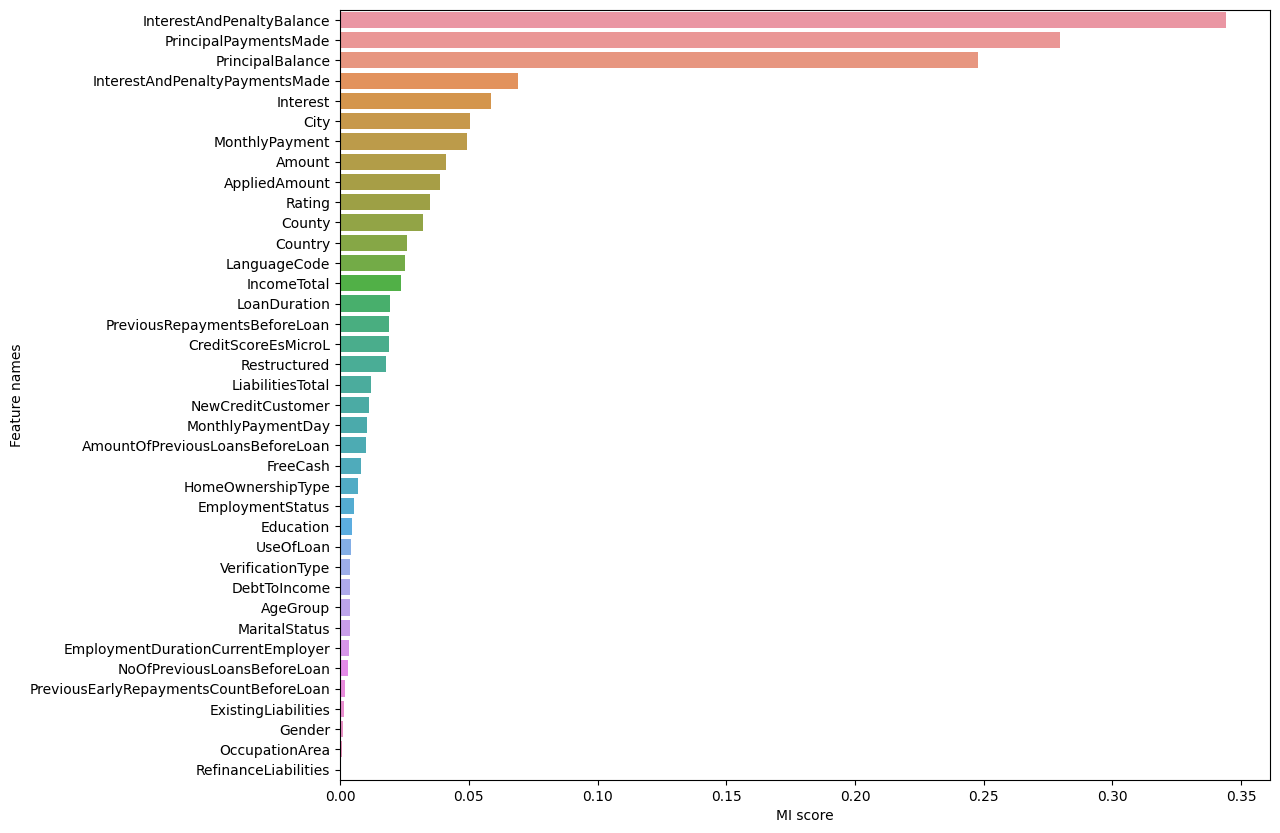

In [201]:
plt.figure(figsize=(12,10))
sns.barplot(y=miSeries.index, x=miSeries.values)
plt.ylabel("Feature names")
plt.xlabel("MI score")

In [202]:
print(miSeries[miSeries>0.01].index)
better_columns =miSeries[miSeries>0.01].index
model_features = features[better_columns]
print(model_features.shape)
model_features.sample(5)

Index(['InterestAndPenaltyBalance', 'PrincipalPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyPaymentsMade', 'Interest',
       'City', 'MonthlyPayment', 'Amount', 'AppliedAmount', 'Rating', 'County',
       'Country', 'LanguageCode', 'IncomeTotal', 'LoanDuration',
       'PreviousRepaymentsBeforeLoan', 'CreditScoreEsMicroL', 'Restructured',
       'LiabilitiesTotal', 'NewCreditCustomer', 'MonthlyPaymentDay',
       'AmountOfPreviousLoansBeforeLoan'],
      dtype='object')
(77394, 22)


,InterestAndPenaltyBalance,PrincipalPaymentsMade,PrincipalBalance,InterestAndPenaltyPaymentsMade,Interest,City,MonthlyPayment,Amount,AppliedAmount,Rating,County,Country,LanguageCode,IncomeTotal,LoanDuration,PreviousRepaymentsBeforeLoan,CreditScoreEsMicroL,Restructured,LiabilitiesTotal,NewCreditCustomer,MonthlyPaymentDay,AmountOfPreviousLoansBeforeLoan
51375,7389.61,0.00,1372.262893,0.00,59.73,3698.0,130.393314,2472.673771,2746.981169,6.0,-1.0,2.0,2.0,1600.0,60.0,861.138387,0.000000,0.0,0.00,1.0,3.0,0.0
6822,6545.01,0.02,2044.980000,0.00,75.48,1003.0,130.393314,2045.000000,2975.000000,7.0,75.0,1.0,6.0,3800.0,3.0,0.000000,0.217084,0.0,1140.00,1.0,15.0,0.0
58134,414.09,98.68,4151.320000,1580.01,59.73,4596.0,237.840000,4250.000000,4250.000000,6.0,-1.0,2.0,0.0,3500.0,60.0,861.138387,0.000000,0.0,0.00,1.0,11.0,0.0
21627,0.00,3227.00,0.000000,305.24,17.53,3788.0,99.790000,3227.000000,3505.000000,3.0,294.0,0.0,4.0,855.0,60.0,0.000000,-1.000000,0.0,1179.64,1.0,10.0,0.0
76054,4055.62,464.38,2535.620000,333.68,31.00,3902.0,107.660000,3000.000000,3000.000000,3.0,887.0,2.0,2.0,2138.0,60.0,0.000000,-1.000000,1.0,988.00,1.0,1.0,0.0


In [203]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Normalize the dataset
features_norm = scaler.fit_transform(model_features)
features_norm = pd.DataFrame(features_norm, columns=model_features.columns)
print(features_norm.shape)
features_norm.sample(3)

(77394, 22)


,InterestAndPenaltyBalance,PrincipalPaymentsMade,PrincipalBalance,InterestAndPenaltyPaymentsMade,Interest,City,MonthlyPayment,Amount,AppliedAmount,Rating,County,Country,LanguageCode,IncomeTotal,LoanDuration,PreviousRepaymentsBeforeLoan,CreditScoreEsMicroL,Restructured,LiabilitiesTotal,NewCreditCustomer,MonthlyPaymentDay,AmountOfPreviousLoansBeforeLoan
40737,0.002027,0.020756,0.104952,0.127390,0.223857,0.881660,0.061730,0.094220,0.081252,0.750,0.344792,0.000000,0.285714,0.034273,1.0,0.137601,0.166667,0.0,0.000320,1.0,0.464286,0.038295
27679,0.000245,0.062341,0.004727,0.017832,0.064679,0.260226,0.026383,0.058480,0.049468,0.125,0.753125,0.000000,0.285714,0.050823,1.0,0.048812,0.166667,0.0,0.011778,0.0,0.357143,0.207009
52428,0.000245,0.706567,0.004727,0.581510,0.439427,0.534642,0.468623,0.473955,0.418954,0.875,0.000000,0.666667,0.428571,0.083235,1.0,0.137601,0.166667,0.0,0.000000,1.0,0.642857,0.000000


In [204]:
# Perform PCA
pca = PCA()
feature_pca = pca.fit_transform(features_norm)
feature_pca = pd.DataFrame(feature_pca, columns=[f"PC{i+1}" for i in range(feature_pca.shape[1])])
feature_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,0.168287,-0.595645,-0.660412,-0.363584,-0.566474,0.157691,-0.183922,0.478244,-0.038803,0.101952,0.206723,-0.134916,0.029390,0.125982,-0.145026,0.121026,-0.079033,-0.159745,0.144411,0.223064,-0.005494,-0.012161
1,0.804098,0.111949,-0.589301,-0.343472,-0.446419,0.532868,0.171140,0.279156,-0.228435,0.085111,-0.052800,-0.354791,-0.025640,0.124049,-0.129133,0.071897,-0.027895,-0.139725,0.121560,0.256618,-0.011135,-0.014874
2,0.402729,-0.947610,0.134923,-0.798435,-0.083339,0.292565,-0.195084,0.334052,-0.067758,0.138127,0.272729,-0.124306,-0.098293,0.119426,-0.161498,0.130368,-0.067611,-0.136604,0.055264,0.088764,-0.017885,-0.010012
3,0.066505,-0.454041,-0.656000,-0.415411,-0.489306,0.224089,-0.020971,0.221718,-0.244874,0.085520,0.160092,-0.120606,0.034306,0.152758,-0.171461,0.158151,-0.102920,-0.250769,0.201621,0.233141,-0.008685,-0.011842
4,0.298865,-0.864623,-0.680695,-0.245681,-0.068486,0.303530,-0.074284,0.474272,0.015079,0.112399,0.231353,-0.125979,0.079895,0.097165,-0.155189,0.106020,-0.072209,-0.133462,0.078552,0.062857,-0.007863,-0.009025


[2.37922278e-01 1.33148290e-01 1.26775881e-01 9.03794260e-02
 6.46144180e-02 5.09873233e-02 4.76527340e-02 4.57483851e-02
 4.10875069e-02 3.77949896e-02 2.11677424e-02 1.90159854e-02
 1.50316449e-02 1.45844691e-02 1.29482502e-02 1.13910248e-02
 1.05484738e-02 6.66609032e-03 5.54407101e-03 3.76536880e-03
 3.16005442e-03 6.55929354e-05]


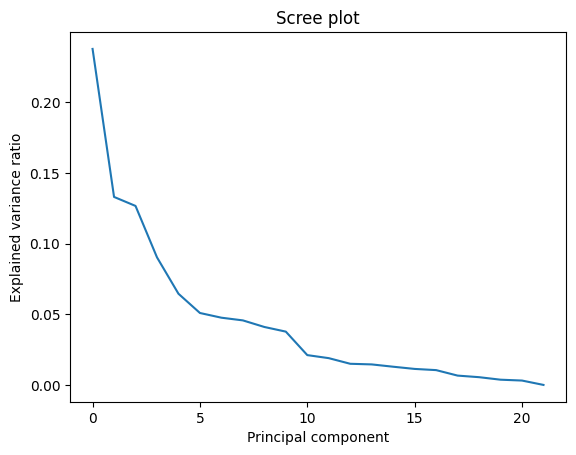

In [205]:
print(pca.explained_variance_ratio_)
# Create a scree plot of the eigenvalues
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.title("Scree plot")
plt.show()


In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [207]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_pca, target, test_size=0.25, random_state=25)

Accuracy score: 0.8760659465605458
Confusion matrix:
[[7356 1299]
 [1099 9595]]


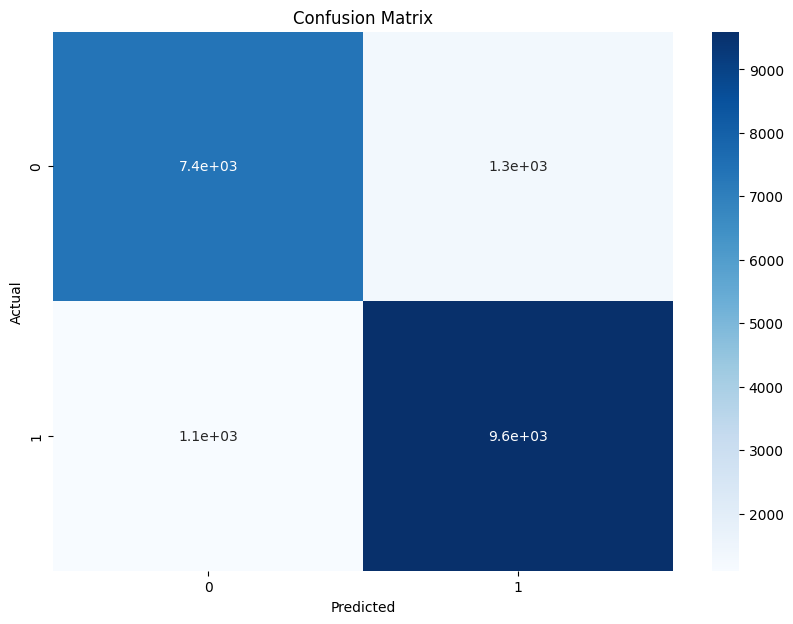

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      8655
           1       0.88      0.90      0.89     10694

    accuracy                           0.88     19349
   macro avg       0.88      0.87      0.87     19349
weighted avg       0.88      0.88      0.88     19349



In [208]:
#random forest classifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train, y_train)
y_pred_rfc = rfc_clf.predict(X_test)


print('Accuracy score:',accuracy_score(y_test, y_pred_rfc))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_rfc))
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



print('Classification report:')
print(classification_report(y_test, y_pred_rfc))

Accuracy score: 0.8662979998966355
Confusion matrix:
[[8094  561]
 [2026 8668]]


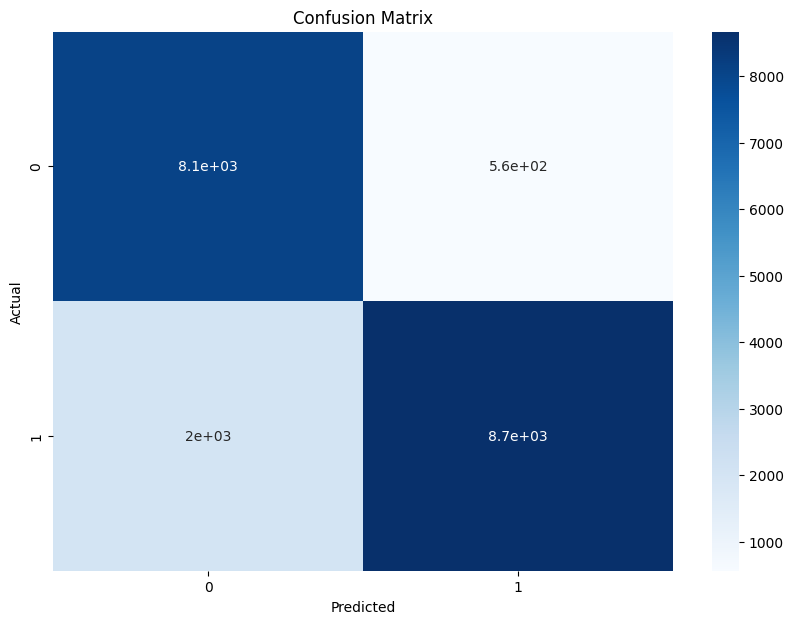

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      8655
           1       0.94      0.81      0.87     10694

    accuracy                           0.87     19349
   macro avg       0.87      0.87      0.87     19349
weighted avg       0.88      0.87      0.87     19349



In [209]:
# Create the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, y_pred_logreg))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_logreg))
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('Classification report:')
print(classification_report(y_test, y_pred_logreg))


Accuracy score: 0.8057263941288956
Confusion matrix:
[[6781 1874]
 [1885 8809]]


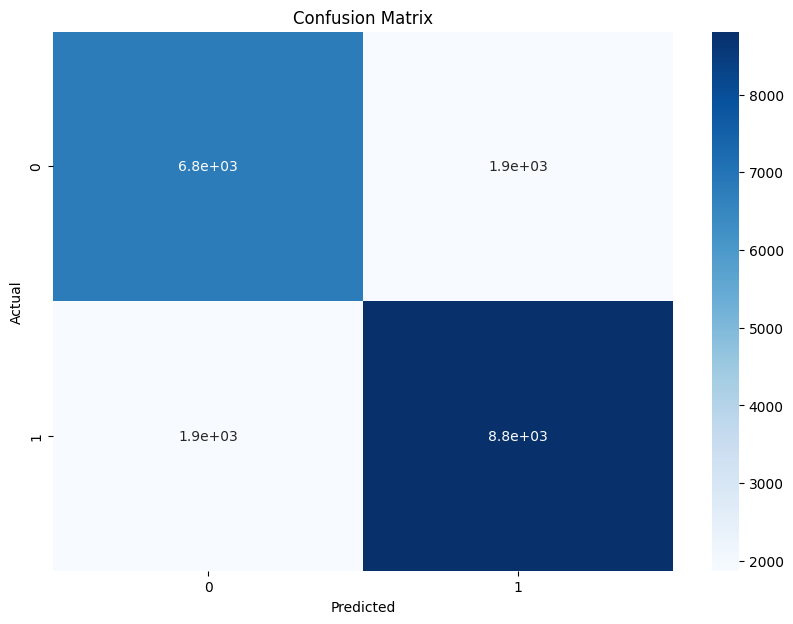

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      8655
           1       0.82      0.82      0.82     10694

    accuracy                           0.81     19349
   macro avg       0.80      0.80      0.80     19349
weighted avg       0.81      0.81      0.81     19349



In [210]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='log_loss')
DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)
accuracy_score(y_test,y_pred_DT)

print('Accuracy score:', accuracy_score(y_test, y_pred_DT))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_DT))
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('Classification report:')
print(classification_report(y_test, y_pred_DT))

In [211]:
results = pd.DataFrame(columns =['accuracy_score', 'F1 score'], index = ["Random Forest Classifier" , "Logistic Regression" , "Decision Tree Classifier" ])

In [212]:
results.loc['Random Forest Classifier'] = [accuracy_score(y_test, y_pred_rfc), round(f1_score(y_test, y_pred_rfc), 2)]
results.loc['Logistic Regression'] = [accuracy_score(y_test, y_pred_logreg), round(f1_score(y_test, y_pred_logreg), 2)]
results.loc['Decision Tree Classifier'] = [accuracy_score(y_test, y_pred_DT), round(f1_score(y_test, y_pred_DT), 2)]


In [213]:
results

,accuracy_score,F1 score
Random Forest Classifier,0.876066,0.89
Logistic Regression,0.866298,0.87
Decision Tree Classifier,0.805726,0.82
